# Análisis de Texto - Tweets de Elon Musk
El análisis de texto ha tomado mucha popularidad en la actualidad debido a su impacto, puesto que se ha convertido en la principal fuente de información de diversos estudios como el análisis de reputación de empresas, productos, personalidades, predicción de tendencias, entre muchas otras aplicaciones. El análisis de texto engloba un conjunto de técnicas que permiten estructurar la información heterogénea que se encuentra presente en los textos con la finalidad de poder identificar patrones, como lo es el uso de las palabras de una determinada persona, así como extraer nueva información.

En la presente actividad, se analizarán publicaciones que ha realizado Elon Musk con el objetivo de identificar las palabras más frecuentemente empleadas por el usuario en la red social de X. A través del análisis de frecuencia de términos, se puede obtener una visión sobre sus temas de interés más recurrentes, el tono de sus mensajes y las posibles variaciones en su lenguaje a lo largo del tiempo.


# Librerías
Las librerías que vamos a utilizar para llevar a cabo la actividad son:

In [33]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import re
from dateutil.relativedelta import relativedelta
from nltk.corpus import stopwords


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


#Configuración Gráficas y tablas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Ingesta de Datos
Para la extracción de los datos, se ha utilizado la API proporcionada por la plataforma X (anteriormente conocida como Twitter). En este proceso, empleamos la librería Tweepy, que facilita la comunicación directa con la API, permitiendo la descarga y almacenamiento de las publicaciones de manera eficiente. Los datos extraídos corresponden a los tweets publicados por Elon Musk.

El archivo resultante de la extracción ha sido almacenado en formato CSV y está disponible para su descarga en el siguiente enlace:

[Descargar archivo CSV](https://drive.google.com/uc?export=download&id=1_HaMJwFSFA33kCBhtkU6S1lM7kvBFTjm)

Este conjunto de datos servirá como base para los análisis posteriores, proporcionando un registro detallado de las interacciones y contenidos compartidos por Elon Musk en la plataforma.

In [34]:
# Ingresamos el archivo csv con los datos de Elon Musk en un DataFrame 
# ==============================================================================

df = pd.read_csv('ElonMusk.csv')
df.head(10)

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26 17:18:30
7,@mtaibbi 🤣,117,2848,2022-10-26 17:14:07
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:50


Para comenzar el análisis, es importante conocer la cantidad de tweets presentes en el conjunto de datos, lo cual nos permite tener una visión inicial del tamaño de la muestra con la que trabajaremos. Esto se puede lograr fácilmente utilizando la siguiente instrucción en Python, después de haber cargado el archivo CSV

In [35]:
# Obtenemos el numero de Tweets de Elon Musk
# ==============================================================================

print('Número de Tweets de Elon Musk: ', df.shape[0])

Número de Tweets de Elon Musk:  3060


Conocer la cantidad de datos es un paso fundamental, ya que nos ayuda a planificar el procesamiento y análisis posterior, además de ofrecernos un primer acercamiento a la cantidad de información que tenemos disponible para estudiar los patrones de comportamiento en las publicaciones de Elon Musk

 # 2. Preparación de Datos
Antes de proceder con el análisis, es fundamental realizar una limpieza inicial del conjunto de datos para asegurarnos de que la información sea consistente y adecuada para las técnicas de análisis que aplicaremos. La limpieza de datos nos permite eliminar ruido y asegurarnos de que las columnas y registros sean comprensibles y estén alineados con nuestros objetivos.

El primer paso en esta fase será cambiar el nombre de algunas columnas para que sean más descriptivas. Esto nos ayudará a mejorar la legibilidad del conjunto de datos y facilitará la interpretación de los resultados en etapas posteriores del análisis.

In [36]:
# Renombramos las columnas para facilitar el trabajo con ellas
# ==============================================================================

df.rename(columns = {'Date':'Fecha', 'Tweets':'Contenido'}, inplace = True)

df.head(5)

,Contenido,Retweets,Likes,Fecha
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


Ahora procederemos a comprobar si las columnas del conjunto de datos tienen el tipo de dato adecuado, lo cual es esencial para evitar errores durante el análisis, cada columna debe estar correctamente tipada según su contenido, ya que los tipos de datos incorrectos pueden afectar tanto la eficiencia como la precisión de las operaciones que realizaremos más adelante

In [37]:
# Comprobamos los tipos de datos de las columnas del DataFrame
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Contenido  3060 non-null   object
 1   Retweets   3060 non-null   int64 
 2   Likes      3060 non-null   int64 
 3   Fecha      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


Al revisar el conjunto de datos, podemos observar que la columna de fechas no está en el tipo de dato adecuado, lo que podría dificultar un análisis temporal preciso. Es esencial que las fechas estén en formato datetime para poder realizar análisis basados en el tiempo, como la distribución de tweets por días, meses o incluso horas. Si no realizamos esta corrección, las operaciones como la ordenación cronológica o la creación de gráficos temporales no serían posibles o arrojarían resultados incorrectos.

Para corregir este problema, utilizaremos la función `to_datetime` de la librería Pandas, que nos permitirá convertir la columna al formato adecuado:

In [38]:
# Convertimos la columna Fecha a tipo datetime 
# ==============================================================================

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Verificamos que la columna Fecha se haya convertido a tipo datetime
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Contenido  3060 non-null   object        
 1   Retweets   3060 non-null   int64         
 2   Likes      3060 non-null   int64         
 3   Fecha      3060 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 95.8+ KB


Con este ajuste, podremos ahora realizar análisis temporales adecuados, como identificar los patrones de actividad de Elon Musk en la plataforma X y detectar tendencias de publicación a lo largo del tiempo. Estos análisis nos permitirán observar si existen periodos de mayor o menor actividad, y cómo varían los temas o el tono de sus tweets en diferentes momentos

# 3. Limpieza de Texto
La siguiente etapa consiste en la limpieza del contenido de cada tweet. Esta es una fase crucial en el análisis de texto, ya que su objetivo es eliminar del texto toda aquella información que no aporte relevancia respecto a su temática, estructura o contenido significativo. La limpieza nos ayuda a preparar los datos para llevar a cabo un análisis más profundo.

No existe un único enfoque para realizar la limpieza de texto, ya que depende tanto de la naturaleza del conjunto de datos como de los objetivos específicos del análisis. En el caso de la plataforma X, los usuarios tienen la libertad de escribir de diversas formas, empleando emoticones, abreviaturas, signos especiales, URLs, números y otros caracteres que no aportan valor directo al análisis semántico. Por este motivo, es necesario aplicar técnicas de limpieza que eliminen:

- Signos de puntuación
- Enlaces a páginas web
- Números
- Espacios en blanco múltiples
- Emoticones y otros caracteres especiales

Este proceso se puede llevar a cabo con el siguiente código, utilizando las librerías re (expresiones regulares) y Pandas, por medio de la creación de una función:

In [39]:
# Creamos una función para limpiar el texto de los Tweets 
# ==============================================================================

def limpiar_texto(texto):
    
    # Eliminamos enlaces web 
    # ===========================================================================
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    
    # Eliminamos los emoticones 
    # ===========================================================================
    texto = re.sub(r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]', '', texto)
    
    # Eliminamos las menciones a otros usuarios
    # ===========================================================================
    texto = re.sub(r'\B@\w+', '', texto)
    
    # Eliminamos signos de puntuación y caracteres especiales
    # ===========================================================================
    texto = re.sub(r'[^\w\s]', '', texto)
    
    # Eliminamos los números
    # ===========================================================================
    texto = re.sub(r'\d+', '', texto)
    
    # Colocamos todo el texto en minúsculas
    # ===========================================================================
    texto = texto.lower()
    
    # Eliminamos los espacios en blanco múltiples
    # =========================================================================
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # retornamos el texto limpio 
    # ===========================================================================
    return texto



Para evaluar la efectividad de nuestra limpieza de texto, realizaremos una prueba sobre aquellos mensajes que contengan elementos como emoticones, signos especiales, números y otros caracteres que no son relevantes para el análisis de la temática, estructura y significado del mensaje. En esta prueba, aplicaremos nuestra función de limpieza a tweets que contienen estos caracteres no deseados y compararemos el contenido original con el texto limpio, para asegurarnos de que se ha eliminado todo aquello que no aporta valor semántico.

In [40]:
# Creamos un mensaje que contenga enlaces, emoticones, números y signos de puntuación 
# ==============================================================================

prueba_contenido = [
        '¡Hola! Este es un tweet de prueba con un enlace http://example.com y un emoticono :)',
        'Otro tweet con números 123 y signos de puntuación!!!',
        'Más texto con @menciones y #hashtags y emojis 😃😃'
    ]

# Limpiamos el texto de los mensajes de prueba y lo comparamos con el texto original 
# ==============================================================================

for i in prueba_contenido:
    print('Texto original: ', i)
    print('Texto limpio: ', limpiar_texto(i))
    print('')

Texto original:  ¡Hola! Este es un tweet de prueba con un enlace http://example.com y un emoticono :)
Texto limpio:  hola este es un tweet de prueba con un enlace y un emoticono

Texto original:  Otro tweet con números 123 y signos de puntuación!!!
Texto limpio:  otro tweet con números y signos de puntuación

Texto original:  Más texto con @menciones y #hashtags y emojis 😃😃
Texto limpio:  más texto con y hashtags y emojis



Podemos observar que la limpieza de los mensajes de ejemplo se ha realizado correctamente. Como siguiente paso, vamos a verificar si la función de limpieza funciona adecuadamente aplicándola a 20 observaciones seleccionadas al azar. Este proceso de validación previa nos permitirá asegurarnos de que la limpieza se comporta de manera consistente y elimina correctamente los elementos no deseados antes de aplicarla a todo el conjunto de datos.

Esta etapa es crucial, ya que nos permite detectar posibles errores o casos especiales en los que la función de limpieza pueda fallar o no actuar como se espera. Una vez que confirmemos que la función es efectiva con estas 20 observaciones, podremos proceder con confianza para aplicarla a todo el dataset.

In [41]:
# Seleccionamos 20 observaciones aleatorias para ver el resultado de la limpieza
# ==============================================================================

muestra_aleatoria = df['Contenido'].sample(20, random_state=42)

# Limpiamos el texto de las 20 observaciones seleccionadas
# ==============================================================================

for i in muestra_aleatoria:
    print('Texto original: ', i)
    print('Texto limpio: ', limpiar_texto(i))
    print('')
    

Texto original:  Jack off the board!
Texto limpio:  jack off the board

Texto original:  @WholeMarsBlog Curses, foiled again!
Texto limpio:  curses foiled again

Texto original:  @teslaownersSV @klwtts Yup
Texto limpio:  yup

Texto original:  @jack @wandrinstar web69 is 🔥🔥
Texto limpio:  web is

Texto original:  @EvaFoxU Tesla AI Day #2 will be epic
Texto limpio:  tesla ai day will be epic

Texto original:  @Alan_McGuinness British humor is the best
Texto limpio:  british humor is the best

Texto original:  @ID_AA_Carmack True
Texto limpio:  true

Texto original:  @ashleevance Starman Roadster has traveled enough to have driven every road on Earth 52.8 times https://t.co/3cE6hlDMD4
Texto limpio:  starman roadster has traveled enough to have driven every road on earth times

Texto original:  @lacker @ilyasut Even then, Lenin would’ve gotten nowhere without Ludendorff’s train
Texto limpio:  even then lenin wouldve gotten nowhere without ludendorffs train

Texto original:  @BillyM2k Even 

Se puede observar que la limpieza ha funcionado correctamente en las observaciones de prueba, lo que nos da la confianza necesaria para proceder con la aplicación de la función de limpieza a todo el conjunto de datos.

In [42]:
# Aplicamos la función limpiar_texto a la columna Contenido del DataFrame 
# ==============================================================================

df['Contenido_limpio'] = df['Contenido'].apply(lambda x: limpiar_texto(x))

# Verificamos que se haya creado la nueva columna Contenido_limpio
# ==============================================================================

df.head(5)

,Contenido,Retweets,Likes,Fecha,Contenido_limpio
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today


Esta limpieza preliminar nos permitirá enfocarnos en el contenido relevante de los tweets, eliminando el ruido que podría interferir en el análisis. De este modo, estaremos mejor preparados para extraer información valiosa sobre los patrones de lenguaje y los temas predominantes de las publicaciones de Elon Musk.


# 4. Análisis Exploratorio

A continuación, realizaremos un análisis exploratorio con el objetivo de comprender los patrones de comportamiento y las palabras más utilizadas por Elon Musk en sus tweets. Para empezar, analizaremos el rango de fechas cubierto por el conjunto de datos. Esto nos permitirá conocer el periodo durante el cual se extrajeron los tweets de la plataforma X y nos ayudará a contextualizar mejor las publicaciones y cualquier tendencia temporal observada.

In [43]:
# # Calculamos el rango de fechas de los Tweets de Elon Musk 
# # ==============================================================================

fecha_min = df["Fecha"].min()
print('Fecha mas antigua: ', fecha_min.strftime('%d-%m-%Y'))

fecha_max = df["Fecha"].max()
print('Fecha mas reciente: ', fecha_max.strftime('%d-%m-%Y'), '\n' )

rango_fecha_tweets = relativedelta(fecha_max, fecha_min)
print(f'El rango de fechas de los Tweets de Elon Musk es de {rango_fecha_tweets.months} meses y {rango_fecha_tweets.days} días')


Fecha mas antigua:  27-01-2022
Fecha mas reciente:  27-10-2022 

El rango de fechas de los Tweets de Elon Musk es de 8 meses y 29 días


Se puede observar que la extracción de los tweets realizados por Elon Musk abarca desde el 27 de enero de 2022 hasta el 27 de octubre del mismo año, lo que nos da un lapso de 10 meses en los que se han recopilado todos sus tweets dentro de este rango de tiempo. Este periodo nos permitirá analizar su actividad a lo largo del año y detectar posibles cambios o patrones en su comportamiento en la plataforma.


## 4.1 Cantidad de Tweets a lo largo del tiempo
Lo siguiente que vamos a analizar es la cantidad de tweets realizados a lo largo del tiempo para identificar variaciones en su frecuencia de publicación

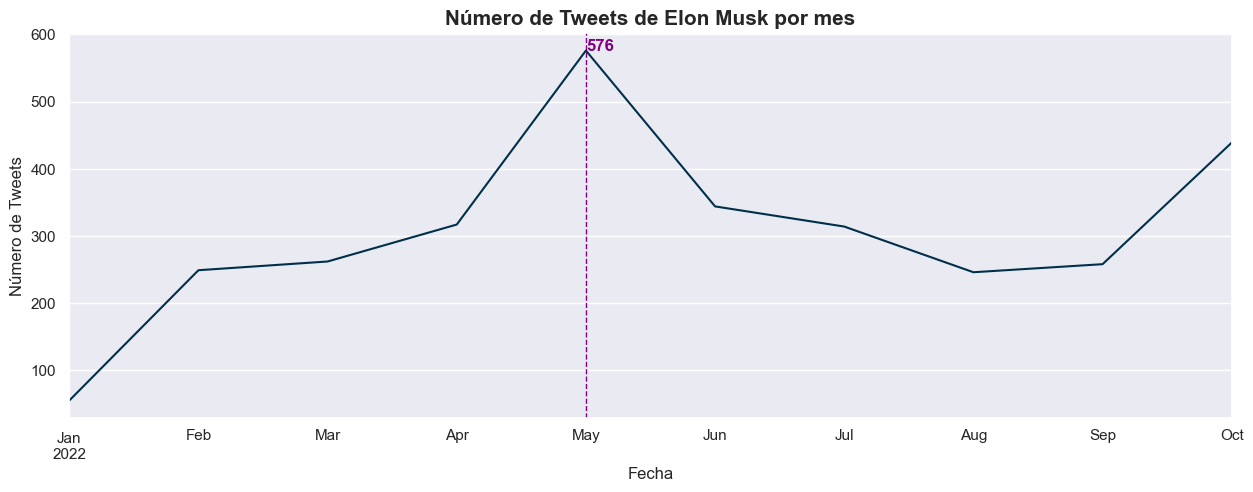

In [44]:
# Creamos la figura y los ejes
# ==========================================================================

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Agrupamos los datos por fecha y contamos el número de Tweets por mes
# ==========================================================================
df_Agrupado = df['Fecha'].groupby(df['Fecha'].dt.to_period('M')).agg('count')

df_Agrupado.plot()

max_tweets = df_Agrupado.max()

axes.axvline(x = df_Agrupado.idxmax(), color = 'purple', linestyle = '--', lw = 1)
axes.text('2022-5-30', max_tweets, max_tweets, color = 'purple', fontsize = 12, weight= 'bold')
axes.set_title('Número de Tweets de Elon Musk por mes', fontsize= 15, weight= 'bold')
axes.set_xlabel('Fecha')
axes.set_ylabel('Número de Tweets');

A partir de la gráfica que muestra la cantidad de tweets realizados por Elon Musk a lo largo del tiempo, podemos observar un pico notable en el mes de mayo, destacándose considerablemente en comparación con los otros meses presentes en el conjunto de datos. Es importante señalar que cuando hablamos de 'tweets', estamos considerando tanto las publicaciones originales como las respuestas o comentarios que Elon Musk ha hecho en la plataforma X, ya que todas estas interacciones se contabilizan como tweets.

Este comportamiento inusual en mayo podría indicar una mayor actividad o interacción del usuario durante ese mes, ya sea por eventos específicos, noticias o debates en los que estuvo involucrado. Para comprender mejor este comportamiento, vamos a realizar un análisis más detallado del mes de mayo, enfocándonos en los días en los que Elon Musk fue más activo en la plataforma X.

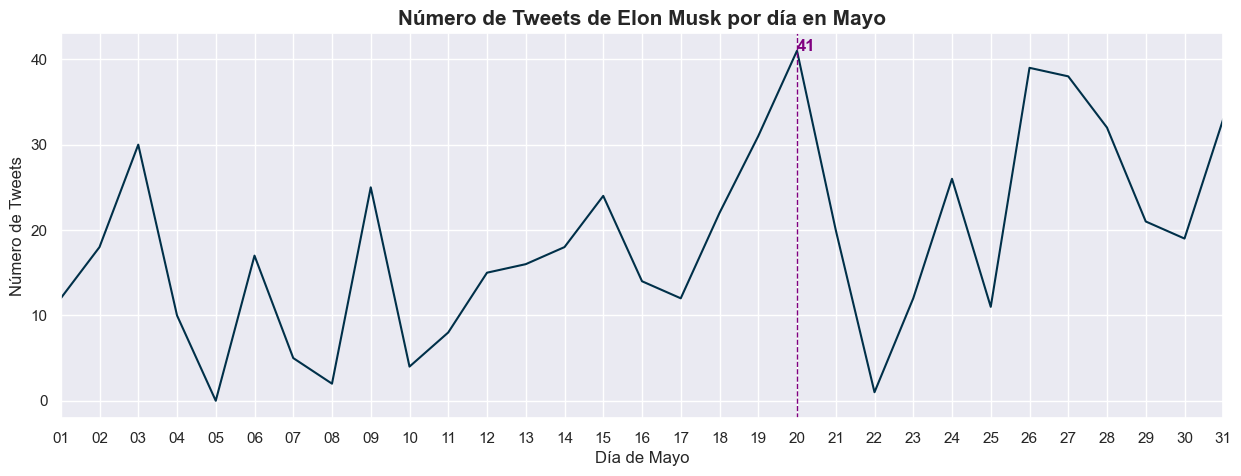

In [45]:
# Creamos la figura y los ejes
# ==========================================================================
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Seleccionamos los datos de acuerdo con el mes de Mayo y contamos el número de Tweets por día
# ==========================================================================
df_Agrupado = df[df['Fecha'].dt.month == 5]['Fecha'].groupby(df['Fecha'].dt.to_period('D')).agg('count')
rango_fechas = pd.date_range(start='2022-05-01', end='2022-05-31', freq='D').to_period('D')
df_Agrupado = df_Agrupado.reindex(rango_fechas, fill_value=0)

df_Agrupado.plot(ax=axes)

max_date = df_Agrupado.idxmax()
max_value = df_Agrupado.max()
axes.axvline(x=max_date, color='purple', linestyle='--', lw=1)
axes.text(max_date.to_timestamp(), max_value, f'{max_value}', color='purple', fontsize=12, weight='bold')

# Configuramos el título y las etiquetas
# ==========================================================================
axes.set_title('Número de Tweets de Elon Musk por día en Mayo', fontsize=15, weight='bold')
axes.set_ylabel('Número de Tweets')
axes.set_xlabel('Día de Mayo')
axes.set_xticks(rango_fechas.to_timestamp())
axes.set_xticklabels(rango_fechas.strftime('%d'))

plt.show()

Se puede observar que el mayor repunte de tweets por parte de Elon Musk ocurrió el 20 de mayo de 2022, con un total de 41 tweets en un solo día. Este nivel inusual de actividad sugiere que algo significativo pudo haber impulsado esa interacción intensa en la plataforma X. Para entender mejor las razones detrás de este comportamiento, vamos a examinar los tweets de Elon Musk que recibieron más *'Likes'* ese día. Al hacerlo, podremos identificar los temas principales que generaron mayor interés o interacción en la plataforma y explorar las posibles causas de este aumento en su actividad.

In [46]:
# Hallamos los Tweets con más Likes del 20 de Mayo de 2022 
# ==============================================================================

df[(df['Fecha'] > '2022-05-20') & (df['Fecha'] < '2022-05-21')].sort_values('Likes', ascending=False).head(5)

,Contenido,Retweets,Likes,Fecha,Contenido_limpio
1892,The attacks against me should be viewed throug...,78978,714253,2022-05-20 03:28:32,the attacks against me should be viewed throug...
1881,Super excited to be in Brazil for launch of St...,52938,588231,2022-05-20 13:40:48,super excited to be in brazil for launch of st...
1887,"Finally, we get to use Elongate as scandal nam...",25935,280993,2022-05-20 05:43:53,finally we get to use elongate as scandal name...
1871,Sus man,20585,249480,2022-05-20 19:28:26,sus man
1867,Tesla is building a hardcore litigation depart...,22204,214590,2022-05-20 20:28:56,tesla is building a hardcore litigation depart...


Vamos a extraer el contenido de cada tweet para analizar los temas y mensajes que Elon Musk compartió.

In [47]:
mensajes = df[(df['Fecha'] > '2022-05-20') & (df['Fecha'] < '2022-05-21')].sort_values('Likes', ascending=False).head(5).Contenido.values

for i in enumerate(mensajes):
    print(f'Tweet {i[0] + 1}: {i[1]} \n')
    

Tweet 1: The attacks against me should be viewed through a political lens – this is their standard (despicable) playbook – but nothing will deter me from fighting for a good future and your right to free speech 

Tweet 2: Super excited to be in Brazil for launch of Starlink for 19,000 unconnected schools in rural areas &amp; environmental monitoring of Amazon! 🇧🇷 🌳 🛰 ♥️ 

Tweet 3: Finally, we get to use Elongate as scandal name. It’s kinda perfect. 🤣 https://t.co/qSNH7lsn72 

Tweet 4: Sus man 

Tweet 5: Tesla is building a hardcore litigation department where we directly initiate &amp; execute lawsuits. The team will report directly to me. 

Please send 3 to 5 bullet points describing evidence of exceptional ability.

justice@tesla.com 



De los tweets realizados por Elon Musk el 20 de mayo de 2022, los temas principales que recibieron más *'Likes'* están relacionados con los siguientes eventos:

- El primero, tercero, cuarto, y quinto tweet se refieren a una noticia publicada por un portal de negocios, que afirmaba que Elon Musk había silenciado una denuncia de acoso sexual presentada en 2016 mediante un acuerdo extrajudicial. En estos tweets, Musk refuta dicha acusación y comenta directamente sobre el caso.

- El segundo tweet está relacionado con una reunión que Elon Musk sostuvo con el presidente de Brasil, Jair Bolsonaro, en la cual menciona sus planes para llevar internet a 19.000 escuelas rurales en Brasil y utilizar satélites para monitorear la Amazonía.

## 4.2 Eliminación de Observaciones Vacías del contenido limpio de los Tweets

Del conjunto de datos se debe destacar que algunos de los tweets solo contienen menciones o emojis, lo que significa que, al aplicar la función de limpieza, algunas filas han quedado con cadenas vacías en la columna `contenido_limpio`. Estas filas ya no aportan valor al análisis, por lo que es necesario eliminarlas del conjunto de datos para garantizar la calidad y consistencia de los resultados posteriores. Antes de realizar la eliminación, vamos a identificar las observaciones.

In [48]:
# Identificamos las observaciones que no tienen contenido después de la limpieza 
# ==============================================================================

df[df['Contenido_limpio'] == '']

,Contenido,Retweets,Likes,Fecha,Contenido_limpio
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26 17:18:30,
7,@mtaibbi 🤣,117,2848,2022-10-26 17:14:07,
14,@dontreadonmeow @nytimes 🤣🔥,130,3208,2022-10-26 14:41:26,
21,@dogeofficialceo @DirtyTesLa @rocobasilisk @Sw...,174,3566,2022-10-25 09:16:17,
...,...,...,...,...,...
3015,@WSJ https://t.co/TowWorRqW9,8654,36611,2022-01-30 20:16:10,
3018,@GailAlfarATX @POTUS @Tesla @JohnnaCrider1 @Sa...,388,8832,2022-01-30 19:43:44,
3025,https://t.co/QEwmhecTmE,35680,310584,2022-01-30 17:38:35,
3028,https://t.co/wTIHLyVkYw,34501,388486,2022-01-30 08:26:30,


Una vez identificadas las 424 observaciones, procedemos a eliminarlas del conjunto de datosUna vez identificadas las 424 observaciones que contienen cadenas vacías tras el proceso de limpieza, procedemos a eliminarlas del conjunto de datos para garantizar que solo trabajemos con información relevante en los siguientes análisis

In [49]:
# Eliminamos las observaciones que no tienen contenido después de la limpieza
# ==============================================================================

df.drop(df[df['Contenido_limpio'] == ''].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df

,Contenido,Retweets,Likes,Fecha,Contenido_limpio
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in
...,...,...,...,...,...
2631,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just that manganese is an alternative to iron ...
2632,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly
2633,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policies are directly responsible for the...
2634,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you should be voted out of office


Se puede observar que la eliminación de las observaciones con contenido vacío se ha realizado correctamente. Esto nos asegura que solo estamos trabajando con tweets que contienen información relevante para nuestro análisis. Ademas, es necesario eliminar el contenido que solo contenga una letra, ya que no nos proporciona información relevante para el análisis

In [50]:
# Eliminamos los Tweets que están formados por una sola letra
# ==============================================================================

df.drop(df[df['Contenido_limpio'].str.len() == 1].index, inplace=True)

df.reset_index()
df

,Contenido,Retweets,Likes,Fecha,Contenido_limpio
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in
...,...,...,...,...,...
2631,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just that manganese is an alternative to iron ...
2632,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly
2633,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policies are directly responsible for the...
2634,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you should be voted out of office


## 4.3 Tokenización de Texto
A continuación, vamos a realizar la tokenización del contenido limpio de los tweets del conjunto de datos. La tokenización consiste en dividir el texto en unidades más pequeñas, conocidas como tokens. Un token es el elemento más simple que tiene significado propio en el análisis de texto. Esta técnica es fundamental para poder identificar palabras, frases o patrones en el texto. Además, eliminaremos los tokens que tengan una longitud menor a dos caracteres, ya que normalmente no aportan valor semántico o relevante al análisis (como letras sueltas o abreviaciones muy cortas).

In [51]:
# Creamos una función para tokenizar el texto de los Tweets
# ==============================================================================

def tokenizar_texto(texto):
    
    # Dividimos el texto en palabras
    # ===========================================================================
    palabras = texto.split(sep=' ')
    
    # Eliminacion de Tokens que tengan una longitud menor a 2 caracteres
    # ===========================================================================
    palabras = [palabra for palabra in palabras if len(palabra) > 1]
    
    # Retornamos el texto tokenizado
    # ===========================================================================
    return palabras

Vamos a comprobar que la Tokenización se realice de la manera correcta

In [52]:
#Comprobamos que la función tokenizar_texto funcione correctamente
# ===========================================================================

mensaje = 'Este es un mensaje de prueba para tokenizar el texto, a ver si funciona correctamente'

print('Texto tokenizado: ', tokenizar_texto(mensaje))

Texto tokenizado:  ['Este', 'es', 'un', 'mensaje', 'de', 'prueba', 'para', 'tokenizar', 'el', 'texto,', 'ver', 'si', 'funciona', 'correctamente']


Se puede observar que la tokenización se ha realizado de manera adecuada. Además, las palabras formadas por una sola letra, como 'a', no han sido incluidas en el proceso de tokenización, lo que asegura que estamos trabajando solo con tokens relevantes. Ahora procederemos a aplicar la tokenización a todas las observaciones del conjunto de datos para continuar con el análisis.

In [53]:
# Aplicamos la función tokenizar_texto a la columna Contenido_limpio del DataFrame
# ===========================================================================

df['Contenido_tokenizado'] = df['Contenido_limpio'].apply(lambda x: tokenizar_texto(x))
df[['Contenido_limpio', 'Contenido_tokenizado']].head(10)

,Contenido_limpio,Contenido_tokenizado
0,thanks,[thanks]
1,absolutely,[absolutely]
2,dear twitter advertisers,"[dear, twitter, advertisers]"
3,meeting a lot of cool people at twitter today,"[meeting, lot, of, cool, people, at, twitter, ..."
4,entering twitter hq let that sink in,"[entering, twitter, hq, let, that, sink, in]"
5,definitely closer to citizen journalism local ...,"[definitely, closer, to, citizen, journalism, ..."
6,nobody bats,"[nobody, bats]"
7,a beautiful thing about twitter is how it empo...,"[beautiful, thing, about, twitter, is, how, it..."
8,im a big fan of citizen journalism,"[im, big, fan, of, citizen, journalism]"
9,according to unnamed sources close to the matt...,"[according, to, unnamed, sources, close, to, t..."


Una vez realizada la tokenización, es importante notar que a cada observación le corresponde un arreglo con un número variable de tokens. Esto puede dificultar el análisis, ya que realizar operaciones sobre cada token individualmente se vuelve más complejo. Por ello, es necesario expandir la lista de tokens de manera que a cada observación le corresponda un solo token. A este proceso se le conoce como 'expansión' o 'unnest'. Aunque pueda parecer poco eficiente, ya que aumenta significativamente la cantidad de filas en el DataFrame, este cambio facilita operaciones clave como la agrupación, el conteo y la generación de gráficos.

Sin embargo, antes de realizar este proceso, es necesario añadir un identificador (Id) a cada Tweet. Esto nos permitirá identificar fácilmente cuáles tokens pertenecen a un Tweet en particular, asegurando que podamos rastrear y analizar la información de manera más efectiva



In [54]:
# Añadimos un id a cada Tweet para poder identificarlos de manera única 
# ===========================================================================

df['Id'] = range(1, len(df) + 1)

df

,Contenido,Retweets,Likes,Fecha,Contenido_limpio,Contenido_tokenizado,Id
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,[thanks],1
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,[absolutely],2
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,"[dear, twitter, advertisers]",3
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today,"[meeting, lot, of, cool, people, at, twitter, ...",4
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,entering twitter hq let that sink in,"[entering, twitter, hq, let, that, sink, in]",5
...,...,...,...,...,...,...,...
2631,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just that manganese is an alternative to iron ...,"[just, that, manganese, is, an, alternative, t...",2629
2632,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly,[exactly],2630
2633,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policies are directly responsible for the...,"[your, policies, are, directly, responsible, f...",2631
2634,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you should be voted out of office,"[you, should, be, voted, out, of, office]",2632


In [55]:
# Expansión de la columna Contenido_tokenizado
# ===========================================================================

df_tokenizado = df.explode(column='Contenido_tokenizado', )
df_tokenizado = df_tokenizado.drop(columns=['Contenido_limpio', 'Contenido', 'Retweets', 'Likes'])
df_tokenizado.reset_index(drop=True, inplace=True)
df_tokenizado

,Fecha,Contenido_tokenizado,Id
0,2022-10-27 16:17:39,thanks,1
1,2022-10-27 13:19:25,absolutely,2
2,2022-10-27 13:08:00,dear,3
3,2022-10-27 13:08:00,twitter,3
4,2022-10-27 13:08:00,advertisers,3
...,...,...,...
29073,2022-01-27 21:00:09,are,2633
29074,2022-01-27 21:00:09,free,2633
29075,2022-01-27 21:00:09,from,2633
29076,2022-01-27 21:00:09,govtmedia,2633


## 4.4 Frecuencia de Palabras en Los Tweets

Ahora procederemos a calcular la cantidad total de palabras que ha utilizado Elon Musk en la plataforma de X a lo largo de los 9 meses que abarca nuestro conjunto de datos, esto nos permitirá comprender mejor su estilo de comunicación y determinar la frecuencia de uso de palabras específicas, de esta forma, podremos identificar términos recurrentes y temas predominantes en sus publicaciones, lo que nos ayudará a obtener información valiosa sobre su enfoque y las áreas de interés que aborda en la plataforma X.

In [56]:
# Hallamos la cantidad total de palabras en los Tweets de Elon Musk 
# ===========================================================================

print('Cantidad total de palabras en los Tweets de Elon Musk: ', df_tokenizado.shape[0])

Cantidad total de palabras en los Tweets de Elon Musk:  29078


Elon Musk ha utilizado un total de 29,081 palabras a lo largo de las publicaciones extraídas en el DataFrame. Ahora procederemos a calcular la cantidad de palabras distintas que ha utilizado el usuario en sus tweets.

In [57]:
# Hallamos la cantidad de palabras únicas en los Tweets de Elon Musk
# ===========================================================================

print(f'Cantidad de palabras únicas en los Tweets de Elon Musk: {df_tokenizado.Contenido_tokenizado.nunique()}')

Cantidad de palabras únicas en los Tweets de Elon Musk: 5502


Con 29,081 palabras totales y 5,502 únicas, podemos ver que Elon Musk tiene un vocabulario bastante variado, esto nos indica que aborda muchos temas diferentes y usa un lenguaje diverso, lo que puede hacer que sus publicaciones sean más atractivas, sin embargo, la relación entre las palabras totales y únicas que es aproximadamente 5.3 veces, sugiere que repite ciertas palabras o frases, quizás para enfatizar ideas clave, también, si hay palabras únicas que se repiten, podría reflejar los temas recurrentes en su comunicación

Ahora procederemos a calcular la longitud media de los Tweets publicados por Elon Musk, de tal forma que nos permitirá identificar no solo la longitud promedio de sus publicaciones, sino también evaluar si esa longitud es consistente a lo largo del tiempo. Con esta información, podremos entender mejor su estilo de comunicación y si prefiere mensajes breves o más elaborados, analizar la longitud de los Tweets rsulta ser clave para identificar patrones en su forma de expresarse.

In [58]:
# Longitud y media de las palabras en los Tweets de Elon Musk 
# ===========================================================================

df_frecuencia = pd.DataFrame(df_tokenizado.groupby(by= 'Id')['Contenido_tokenizado'].count())
df_frecuencia.reset_index()
df_frecuencia['Contenido_tokenizado'].describe()

count    2633.000000
mean       11.043676
std        10.899408
min         1.000000
25%         3.000000
50%         7.000000
75%        16.000000
max        51.000000
Name: Contenido_tokenizado, dtype: float64

Podemos observar que la longitud media de las publicaciones de Elon Musk ronda las 11 palabras. Sin embargo, la desviación estándar es considerablemente grande, con un valor de 10, lo que indica que la longitud de sus publicaciones es bastante variada, además, se puede destacar que al menos el 75% de las publicaciones tienen una longitud de 16 palabras o menos. Por otro lado, la mayor longitud de palabras que ha utilizado en una publicación es de 51 palabras, esto sugiere que, si bien Elon Musk tiende a realizar publicaciones breves, también hay ocasiones en las que se extiende más en sus mensajes, lo que puede reflejar la complejidad de los temas que aborda o su intención de comunicar información detallada.

## 4.5 Palabras más utilizadas en los Tweets

A continuación, vamos a identificar las palabras más utilizadas por Elon Musk en sus publicaciones, este análisis es fundamental ya que nos permite comprender los temas que más suele mencionar en sus mensajes, así como los intereses y preocupaciones que predominan en su comunicación, al analizar la frecuencia de las palabras, podemos obtener insights sobre sus enfoques, opiniones y el tipo de contenido que genera mayor interacción en la plataforma. Esto no solo enriquece nuestra comprensión de su presencia en la red social, sino que también puede ayudar a identificar tendencias en la conversación pública en torno a su figura.

In [59]:
# Hallamos las palabras más frecuentes en los Tweets de Elon Musk
# ===========================================================================

df_frecuencia_palabras = df_tokenizado['Contenido_tokenizado'].value_counts().reset_index()
df_frecuencia_palabras.columns = ['Palabra', 'Frecuencia']

print(df_frecuencia_palabras.head(20))

   Palabra  Frecuencia
0      the         890
1       to         818
2       is         739
3       of         557
4       in         402
5     that         321
6      for         309
7       be         302
8      amp         285
9       it         255
10    will         240
11     but         236
12    this         231
13     are         231
14      on         214
15     and         195
16    with         190
17      so         181
18      we         179
19     not         174


Representamos gráficamente el resultado

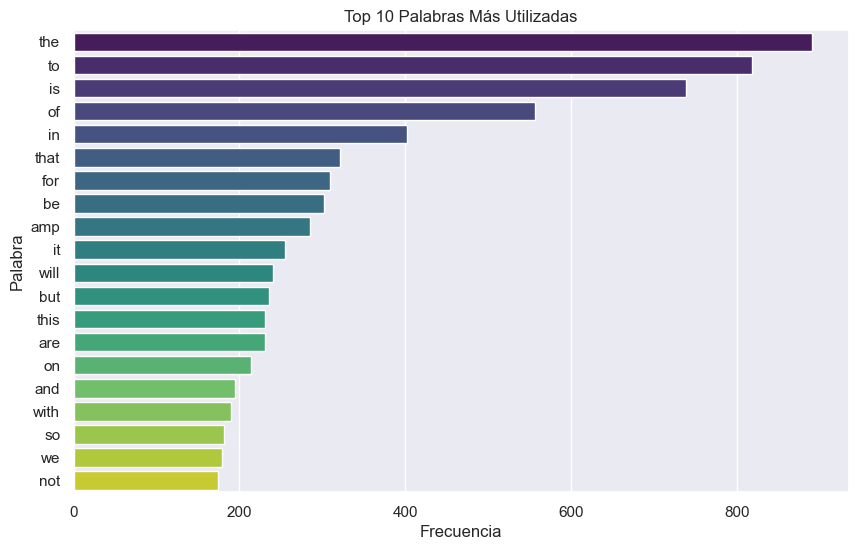

In [60]:
# Representamos gráficamente  el resultado utilizando Seaborn y con barras horizontales
# ===========================================================================

plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia_palabras.head(20), palette='viridis')
plt.title('Top 10 Palabras Más Utilizadas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

Se puede observar que los términos más frecuentes en las publicaciones corresponden a artículos, preposiciones y pronombres. Generalmente, estas palabras no nos aportan información relevante acerca del contenido del texto; a este tipo de palabras se les conoce como *Stop Words*. Cada idioma tiene su propio listado de Stop Words, lo cual es un aspecto a tener en cuenta en nuestros análisis. En algunos casos, puede ser necesario adaptar este listado a nuestras necesidades específicas.

Para este análisis, accederemos al listado de Stop Words del idioma inglés a través del módulo `stopwords` de la biblioteca NLTK. Esto nos permitirá limpiar nuestros datos de manera más efectiva y centrarnos en las palabras que realmente aportan valor al contenido de los Tweets.

In [61]:
# Generamos la lista de palabras que no aportan información
# ===========================================================================

stop_words = list(stopwords.words('english'))
stop_words.extend(['amp', 'would', 'im', 'much', 'yes', 'true', 'one', 'many', 'even', 'like', 'also', 'yeah', 'haha', ])
stop_words.sort()
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'also', 'am', 'amp', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'even', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'haha', 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'im', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'like', 'll', 'm', 'ma', 'many', 'me', 'mightn', "mightn't", 'more', 'most', 'much', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'one', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "

Ahora procedemos a filtrar las Stop Words en las palabras utilizadas en las publicaciones de Elon Musk

In [62]:
# Realizamos el filtrado de las palabras que no aportan información 
# ===========================================================================

df_tokenizado = df_tokenizado[~df_tokenizado['Contenido_tokenizado'].isin(stop_words)]

Una vez eliminadas las Stop Words que no aportan información relevante sobre los temas de las publicaciones de Elon Musk, realizamos nuevamente el conteo de las 20 palabras más utilizadas en sus Tweets, este análisis nos permitirá identificar con mayor precisión los tópicos más recurrentes y las ideas clave que predominan en su comunicación en la plataforma.

In [63]:
df_frecuencia_palabras = df_tokenizado['Contenido_tokenizado'].value_counts().reset_index()
df_frecuencia_palabras.columns = ['Palabra', 'Frecuencia']

# Mostrar el DataFrame de frecuencias
print(df_frecuencia_palabras.head(20))

     Palabra  Frecuencia
0      tesla         148
1       good         100
2     people          97
3    twitter          96
4   starlink          79
5       time          65
6      great          62
7    exactly          55
8       make          52
9      think          52
10     still          52
11    spacex          50
12     maybe          49
13      year          47
14      high          47
15  probably          47
16      dont          46
17      next          44
18       far          44
19     thats          43


Generamos la representación gráfica de las palabras mas usadas en las publicaciones

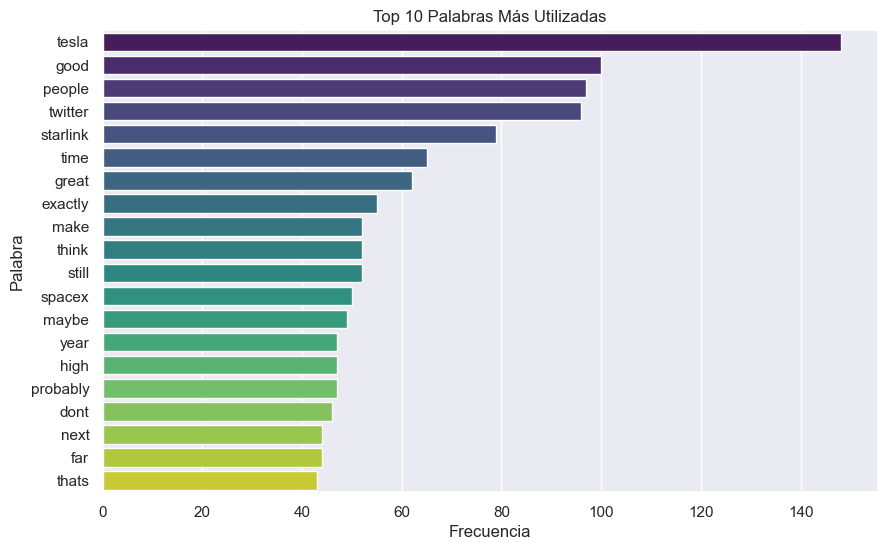

In [64]:
# Representamos gráficamente el resultado utilizando Seaborn y con barras horizontales
# ===========================================================================

plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia_palabras.head(20), palette='viridis')
plt.title('Top 10 Palabras Más Utilizadas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

De las palabras más mencionadas en las publicaciones de Elon Musk se puede observar:

- "Tesla" es la palabra más mencionada, lo que sugiere un enfoque constante en su empresa de automóviles eléctricos y las innovaciones en el sector.

- Palabras como "people" y "good" indican que Musk busca conectarse emocionalmente con su audiencia y generar un sentimiento positivo, el uso de estas palabras puede ser una estrategia para fomentar la lealtad y la confianza de sus seguidores, mostrándose accesible y preocupado por el bienestar de los demás.

- La inclusión de "twitter" resalta la importancia de la plataforma en su comunicación y su atención a las interacciones en la plataforma.

- Los Términos como "think", "make", "maybe" y "probably" aportan un tono conversacional, sugiriendo que busca involucrar a sus seguidores en un diálogo abierto, esto puede indicar su interés en escuchar la opinión de los demás y su disposición a considerar diferentes perspectivas, lo que puede ser una táctica para fomentar la participación de la comunidad.

- Palabras como "starlink" y "spacex" refuerzan su enfoque en la innovación tecnológica y la exploración de nuevos horizontes, al mencionar estos términos, Eln Musk resalta su papel en la industria espacial y en la conectividad global, alineándose con su visión de un futuro interconectado.


# Referencias BBibliográficas

- Blake, C. (2011). Text mining. Annual review of information science and technology, 45(1), 121-155.

- Sukanya, M., & Biruntha, S. (2012, August). Techniques on text mining. In 2012 ieee international conference on advanced communication control and computing technologies (icaccct) (pp. 269-271). IEEE.

- Amat, J. (2020). Análisis de texto (text mining) con Python, disponible con licencia CC BY-NC-SA 4.0 en https://www.cienciadedatos.net/documentos/py25-text-mining-python.html